In [1]:
import pandas as pd
import os
from pyFTS.common import Util as cUtil
from pyFTS.benchmarks import Measures
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics import tsaplots as tsp
from statsmodels.tsa.seasonal import seasonal_decompose
from pyFTS.benchmarks import ResidualAnalysis, Measures
from scipy.special import boxcox, inv_boxcox

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
os.chdir("/Users/cseveriano/spatio-temporal-forecasting/")

fln_df = pd.read_csv('data/processed/SONDA/FLN-15min.csv', sep=";", parse_dates=['date'], index_col='date')

joi_df = pd.read_csv('data/processed/SONDA/JOI-15min.csv', sep=";", parse_dates=['date'], index_col='date')

sbr_df = pd.read_csv('data/processed/SONDA/SBR-15min.csv', sep=";", parse_dates=['date'], index_col='date')

In [34]:
fln_test = fln_df[(fln_df.index >= '2014-09-01') & (fln_df.index <= '2014-09-30')]
joi_test = joi_df[(joi_df.index >= '2014-09-01') & (joi_df.index <= '2014-09-30')]
sbr_test = sbr_df[(sbr_df.index >= '2014-09-01') & (sbr_df.index <= '2014-09-30')]

#fln_test = fln_test.dropna(axis=0, how='any')

In [33]:
fln_df.describe

<bound method NDFrame.describe of                         glo_avg     dir_avg    diff_avg      lw_avg  \
date                                                                  
2013-11-01 00:00:00   -0.634143   -0.212643   -1.005929  399.600000   
2013-11-01 00:15:00   -0.652333   -0.262600   -1.066133  399.020000   
2013-11-01 00:30:00   -0.709533   -0.269000   -1.155000  398.840000   
2013-11-01 00:45:00   -0.716267   -0.063067   -1.157000  398.833333   
2013-11-01 01:00:00   -0.714733   -0.040333   -1.157000  398.633333   
2013-11-01 01:15:00   -0.687200   -0.028133   -1.157533  398.000000   
2013-11-01 01:30:00   -0.721200   -0.016267   -1.157733  396.620000   
2013-11-01 01:45:00   -0.715667   -0.038333   -1.152067  396.633333   
2013-11-01 02:00:00   -0.691867   -0.195800   -1.137267  396.700000   
2013-11-01 02:15:00   -0.677000   -0.271800   -1.142000  396.420000   
2013-11-01 02:30:00   -0.670000   -0.226533   -1.079333  396.780000   
2013-11-01 02:45:00   -0.655467   -0.027800

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50]),
 array([  3.28704756e-04,  -4.35057197e-04,  -6.92603090e-04,
         -5.14311740e-04,   9.24464152e-05,   1.13156820e-03,
          2.62392453e-03,   4.64079851e-03,   7.28459605e-03,
          1.06484151e-02,   1.48698798e-02,   2.00481466e-02,
          2.62278748e-02,   3.34912758e-02,   4.20622578e-02,
          5.19669359e-02,   6.31619814e-02,   7.57691804e-02,
          8.98474989e-02,   1.05279817e-01,   1.22287248e

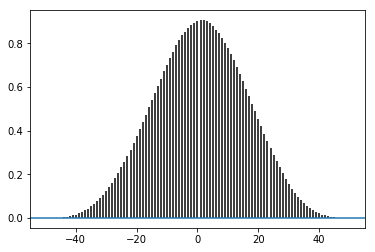

In [22]:
plt.xcorr(fln_test.glo_avg, joi_test.glo_avg, maxlags=50)

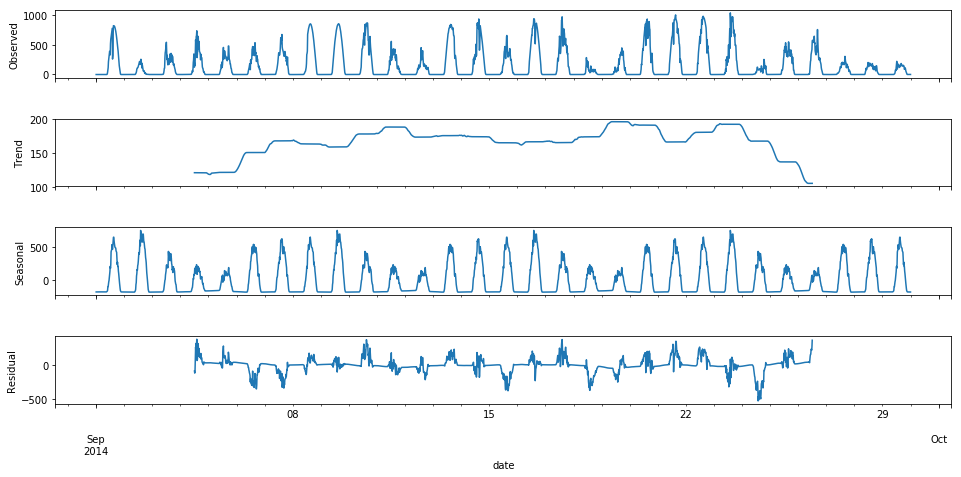

In [35]:
#plt.plot(fln_test.glo_avg)
decomposition = seasonal_decompose(fln_test.glo_avg, freq=672)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [36]:
decomposition = seasonal_decompose(sbr_test.glo_avg, freq=672)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

ValueError: This function does not handle missing values